In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
df['is_repeated_guest'].value_counts()

is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64

In [ ]:
df['previous_cancellations'].value_counts()

previous_cancellations
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: count, dtype: int64

In [ ]:
df['previous_bookings_not_canceled'].value_counts()

previous_bookings_not_canceled
0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: count, Length: 73, dtype: int64

In [ ]:
df['booking_changes'].value_counts()

booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: count, dtype: int64

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#hotel: Type of hotel (e.g., "Resort Hotel" or "City Hotel").
#is_canceled: Indicates if the booking was canceled (1) or not (0).
#lead_time: Number of days between booking date and arrival date.
#arrival_date_year: Year of arrival.
#arrival_date_month: Month of arrival (e.g., January, February).
#arrival_date_week_number: Week number of the arrival date.
#arrival_date_day_of_month: Day of the month for the arrival date.
#stays_in_weekend_nights: Number of weekend nights (Saturday/Sunday) included in the stay.
#stays_in_week_nights: Number of weeknights (Monday to Friday) included in the stay.
#adults: Number of adults in the booking.
#children: Number of children in the booking.
#babies: Number of babies in the booking.
#meal: Meal type included in the booking (e.g., BB for bed and breakfast).
#country: Country of origin of the guests.
#market_segment: Market segment designation (e.g., Online TA, Corporate).
#distribution_channel: Distribution channel used to make the booking (e.g., Direct, TA/TO).
#is_repeated_guest: Indicates if the guest is a returning customer (1) or not (0).
#previous_cancellations: Number of previous bookings canceled by the customer.
#previous_bookings_not_canceled: Number of previous bookings not canceled by the customer.
#reserved_room_type: Code of the room type reserved.
#assigned_room_type: Code of the room type assigned at check-in.
#booking_changes: Number of changes made to the booking.
#deposit_type: Type of deposit made (e.g., No Deposit, Refundable).
#agent: ID of the travel agency used for booking.
#company: ID of the company making the booking (if applicable).
#days_in_waiting_list: Number of days the booking was on a waiting list.
#customer_type: Type of customer (e.g., Contract, Group, Transient).
#adr: Average Daily Rate, which is the revenue generated per occupied room.
#required_car_parking_spaces: Number of car parking spaces required by the customer.
#total_of_special_requests: Number of special requests made by the customer.
#reservation_status: Status of the reservation (e.g., Canceled, Checked-Out).
#reservation_status_date: Date when the reservation status was updated.


In [ ]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                 object
reservation_status_date            object
dtype: object

In [ ]:
categorical_list=['hotel','customer_type','reservation_status','arrival_date_month','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','meal']
for column in categorical_list:
  df[column]=df[column].astype('category')

In [ ]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.dtypes

hotel                                   category
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type                      category
booking_changes                            int64
deposit_type                            category
agent                                    float64
company                                  float64
days_in_waiting_list                       int64
customer_type                           category
adr                                      float64
required_car_parking_spaces                int64
total_of_special_requests                  int64
reservation_status                      category
reservation_status_date           datetime64[ns]
dtype: object

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

In [ ]:
df=df.dropna(subset=['agent', 'company'])

In [ ]:
df.children.unique()

array([0., 1., 2.])

In [ ]:
df['children']=df['children'].fillna(0)

In [ ]:
mode_value = df['country'].mode()[0]
df['country'].fillna(mode_value, inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

In [ ]:
df.days_in_waiting_list.unique()

array([0])

In [ ]:
df.customer_type.unique()

['Transient', 'Transient-Party', 'Group', 'Contract']
Categories (4, object): ['Contract', 'Group', 'Transient', 'Transient-Party']

In [ ]:
mode_value = df['customer_type'].mode()[0]
df['customer_type'].fillna(mode_value, inplace=True)

In [ ]:
df['adr'].unique()

array([ 82.  ,  52.2 ,  48.  ,  40.  ,  42.55,  36.  ,  43.2 ,  42.  ,
        36.75,  40.5 ,  58.2 ,  70.  , 101.  , 117.5 ,  25.  ,  53.  ,
        35.1 ,   0.  ,  49.67,  86.4 ,  37.43,  49.11,  49.5 ,  49.2 ,
        53.45,  37.6 ,  57.  ,  34.2 ,  38.  ,  81.  ,  30.  ,  37.  ,
        67.5 ,  76.  , 189.  , 246.  , 224.  , 212.6 ,  43.  ,  44.  ,
        40.4 ,  66.5 ,  87.13,  96.4 , 163.4 , 135.  , 105.  , 114.  ,
       115.  ,  85.  ,  92.  , 124.  , 108.  , 123.5 ,  72.  ,  94.  ,
       110.  ,  95.  , 101.15, 194.  , 159.  , 100.75, 195.  ,  89.89,
        80.  ,  93.36, 104.5 ,  98.  , 150.  , 120.6 ])

In [ ]:
mean_value = df['adr'].mean()
df['adr'].fillna(mean_value, inplace=True)

In [ ]:
df['required_car_parking_spaces'].unique()

array([1, 0])

In [ ]:

df['required_car_parking_spaces'].fillna(0, inplace=True)


In [ ]:
df['total_of_special_requests'].unique()

array([1, 0, 2, 3])

In [ ]:
df['total_of_special_requests'].fillna(0, inplace=True)


In [ ]:
df['reservation_status'].unique()

['Check-Out', 'Canceled', 'No-Show']
Categories (3, object): ['Canceled', 'Check-Out', 'No-Show']

In [ ]:
mode_value = df['reservation_status'].mode()[0]
df['reservation_status'].fillna(mode_value, inplace=True)

In [ ]:
df['reservation_status_date'].unique()

<DatetimeArray>
['2015-10-13 00:00:00', '2015-11-17 00:00:00', '2015-11-06 00:00:00',
 '2015-11-15 00:00:00', '2015-11-16 00:00:00', '2015-11-04 00:00:00',
 '2015-10-23 00:00:00', '2015-11-10 00:00:00', '2015-11-09 00:00:00',
 '2015-11-11 00:00:00', '2015-11-14 00:00:00', '2015-11-12 00:00:00',
 '2016-05-11 00:00:00', '2016-10-17 00:00:00', '2017-05-15 00:00:00',
 '2015-12-11 00:00:00', '2017-02-01 00:00:00', '2015-10-30 00:00:00',
 '2015-11-25 00:00:00', '2016-05-17 00:00:00', '2015-11-07 00:00:00',
 '2015-11-08 00:00:00', '2017-03-02 00:00:00', '2015-12-02 00:00:00',
 '2016-01-08 00:00:00', '2016-05-03 00:00:00', '2016-02-18 00:00:00',
 '2016-03-17 00:00:00', '2016-04-04 00:00:00', '2016-05-16 00:00:00',
 '2016-07-05 00:00:00', '2016-07-10 00:00:00', '2016-09-03 00:00:00',
 '2016-09-12 00:00:00', '2016-11-29 00:00:00', '2016-12-22 00:00:00',
 '2016-12-24 00:00:00', '2017-01-06 00:00:00', '2017-01-25 00:00:00',
 '2017-03-07 00:00:00', '2017-03-12 00:00:00', '2017-06-13 00:00:00',
 '20

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'] = df['reservation_status_date'].interpolate()


In [ ]:
df['days_in_waiting_list'].unique()

array([0])

In [ ]:
df['days_in_waiting_list'].fillna(0, inplace=True)


In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

#numerical_data:is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests

#categorical_data:hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status

#date_time_data:reservation_status_date


**UNIVARIENT ANALYSIS**
#numerical_data

<Axes: xlabel='is_canceled', ylabel='Count'>

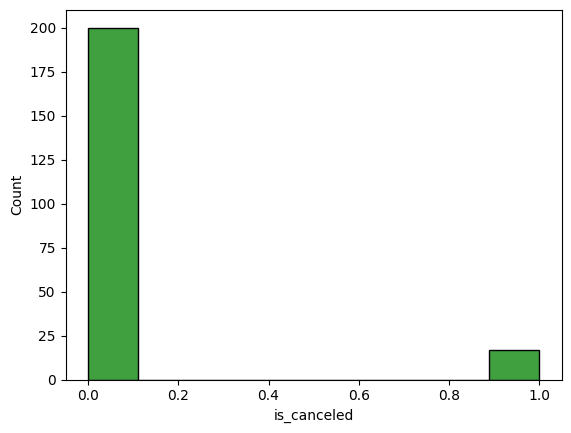

In [ ]:
sns.histplot(df['is_canceled'],color='green')

**conclusion:**from this graph we conclude that most of the bookings are not canceled only 1% are canceled.

<Axes: xlabel='lead_time', ylabel='Count'>

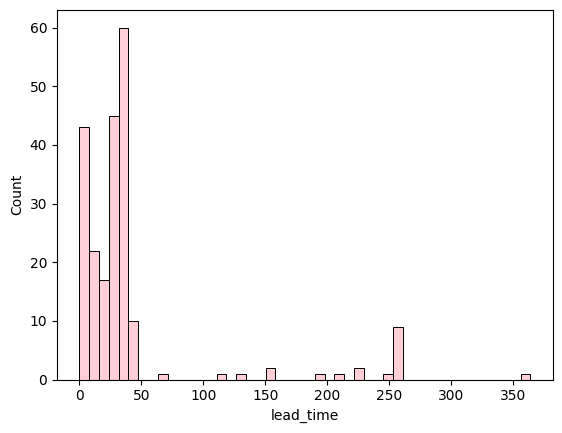

In [ ]:
sns.histplot(df['lead_time'],color='pink')

**conclusion:**from this graph we conclude that most of the people arrived   

<Axes: xlabel='arrival_date_year', ylabel='Count'>

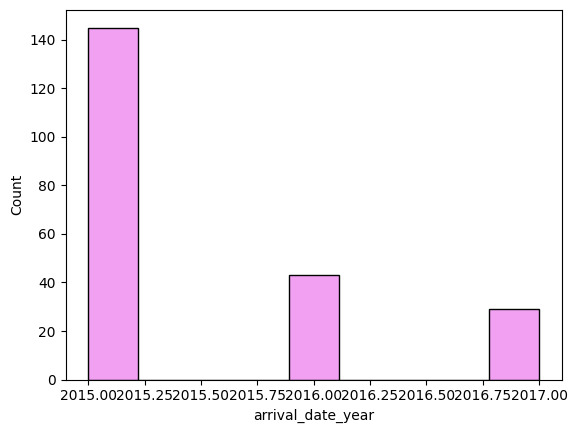

In [ ]:
sns.histplot(df['arrival_date_year'],color='violet')

<Axes: xlabel='arrival_date_week_number', ylabel='Count'>

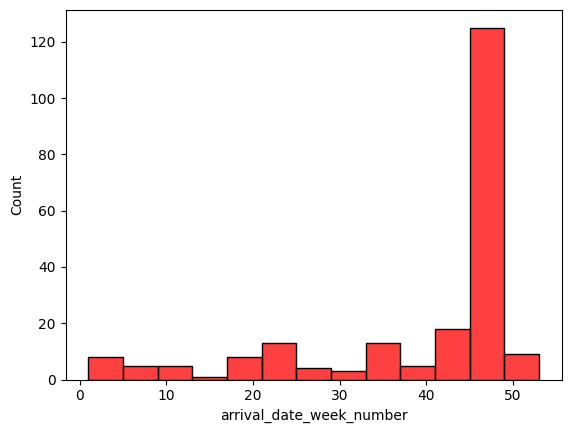

In [ ]:
sns.histplot(df['arrival_date_week_number'],color='red')

<Axes: xlabel='arrival_date_day_of_month', ylabel='Count'>

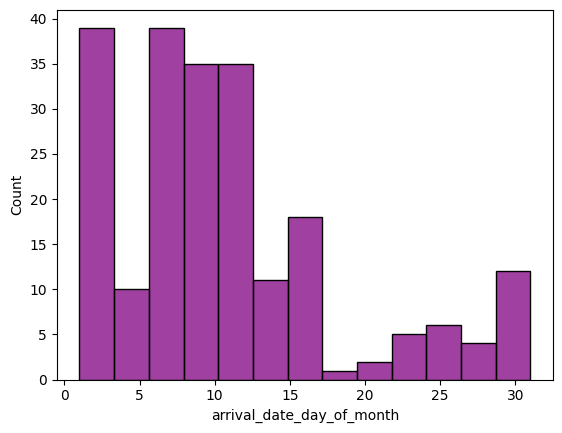

In [ ]:
sns.histplot(df['arrival_date_day_of_month'],color='purple')

<Axes: xlabel='stays_in_weekend_nights', ylabel='Count'>

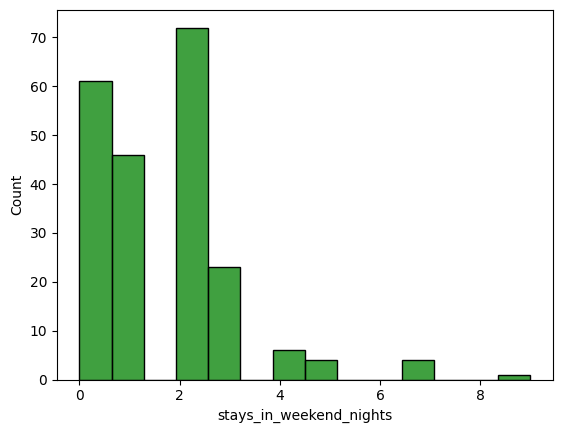

In [ ]:
sns.histplot(df['stays_in_weekend_nights'],color='green')

<Axes: xlabel='stays_in_week_nights', ylabel='Count'>

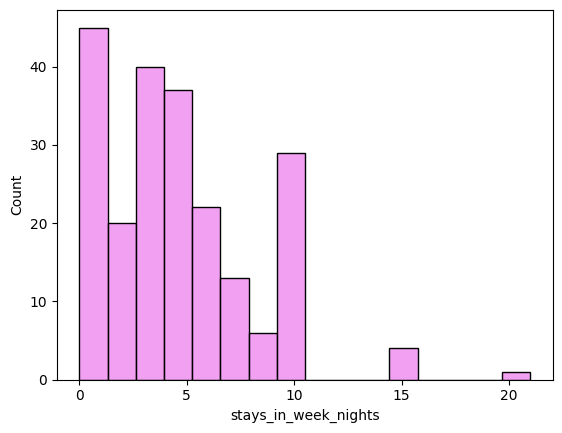

In [ ]:
sns.histplot(df['stays_in_week_nights'],color='violet')

<Axes: xlabel='adults', ylabel='Count'>

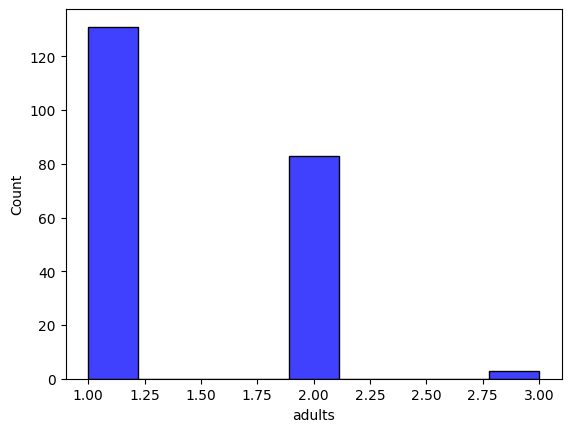

In [ ]:
sns.histplot(df['adults'],color='blue')

<Axes: xlabel='children', ylabel='Count'>

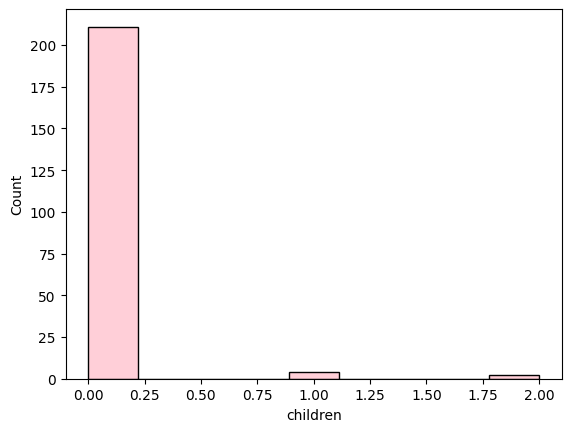

In [ ]:
sns.histplot(df['children'],color='pink')

<Axes: xlabel='is_repeated_guest', ylabel='Count'>

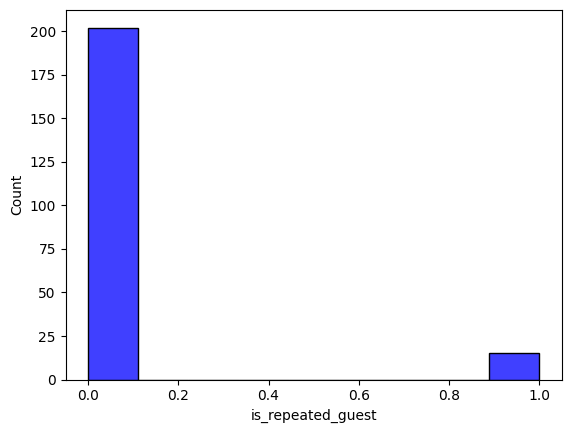

In [ ]:
sns.histplot(df['is_repeated_guest'],color='blue')

<Axes: xlabel='previous_cancellations', ylabel='Count'>

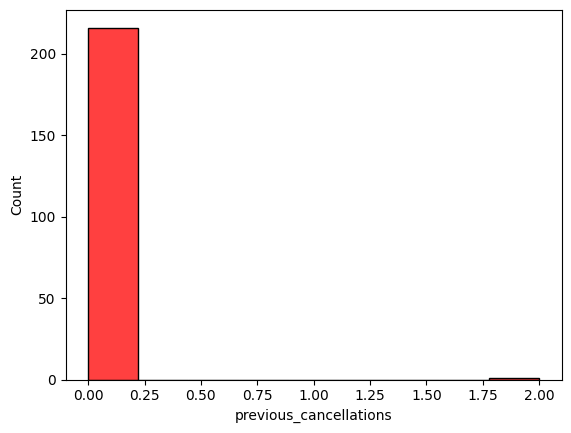

In [ ]:
sns.histplot(df['previous_cancellations'],color='red')

<Axes: xlabel='previous_bookings_not_canceled', ylabel='Count'>

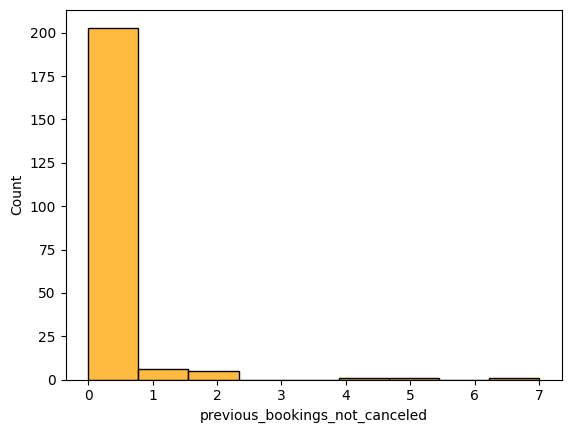

In [ ]:
sns.histplot(df['previous_bookings_not_canceled'],color='orange')

<Axes: xlabel='booking_changes', ylabel='Count'>

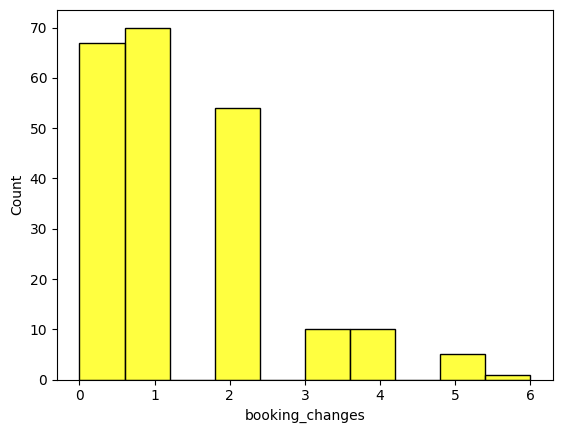

In [ ]:
sns.histplot(df['booking_changes'],color='yellow')

<Axes: xlabel='agent', ylabel='Count'>

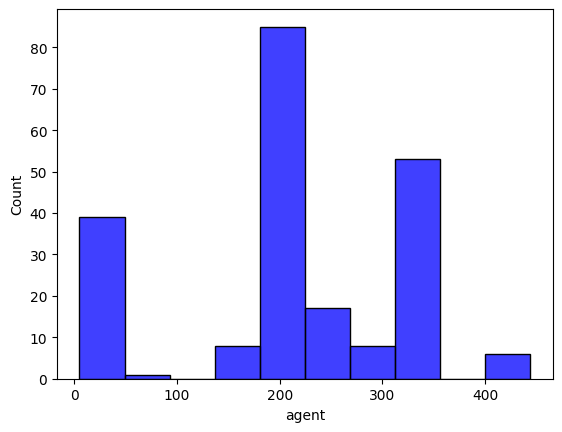

In [ ]:
sns.histplot(df['agent'],color='blue')

<Axes: xlabel='company', ylabel='Count'>

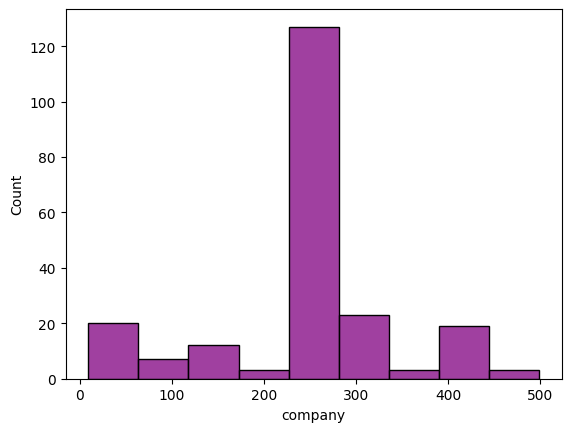

In [ ]:
sns.histplot(df['company'],color='purple')

<Axes: xlabel='adr', ylabel='Count'>

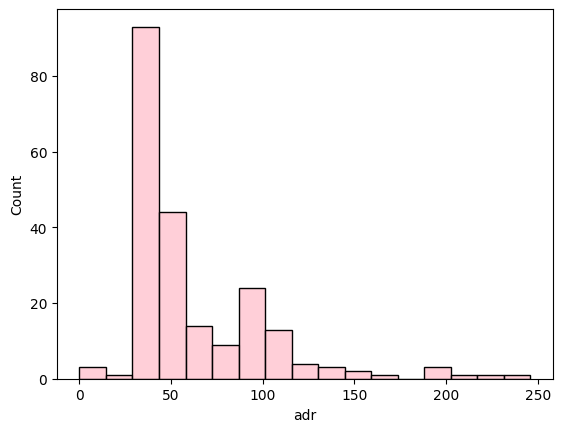

In [ ]:
sns.histplot(df['adr'],color='pink')

<Axes: xlabel='required_car_parking_spaces', ylabel='Count'>

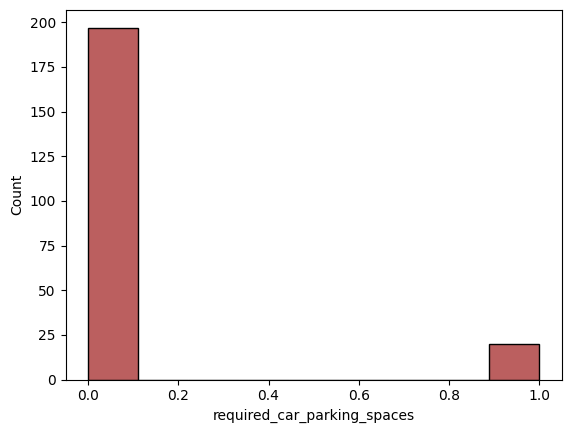

In [ ]:
sns.histplot(df['required_car_parking_spaces'],color='brown')

<Axes: xlabel='total_of_special_requests', ylabel='Count'>

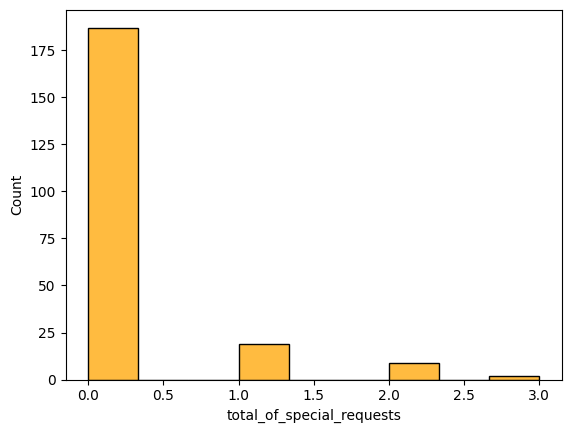

In [ ]:
sns.histplot(df['total_of_special_requests'],color='orange')

**categorical_data**:hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status

<Axes: xlabel='hotel', ylabel='count'>

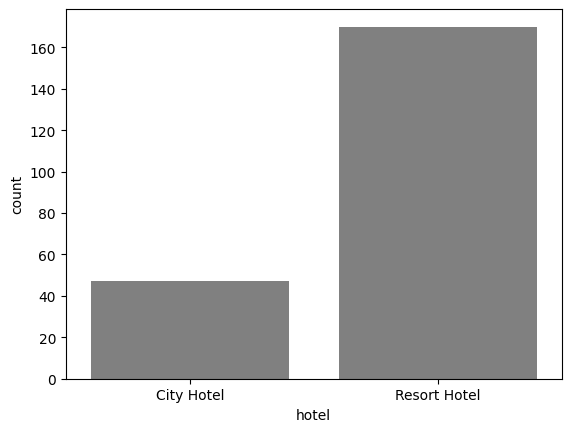

In [ ]:
sns.countplot(x=df['hotel'],color='grey')

<Axes: xlabel='count', ylabel='arrival_date_month'>

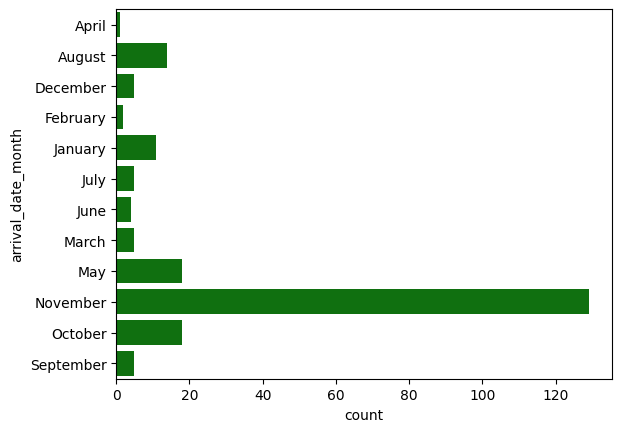

In [ ]:
sns.countplot(df['arrival_date_month'],color='green')

<Axes: xlabel='meal', ylabel='count'>

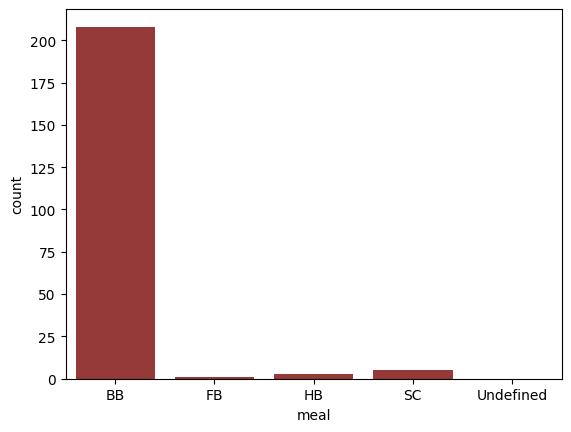

In [ ]:
sns.countplot(x=df['meal'],color='brown')

<Axes: xlabel='market_segment', ylabel='count'>

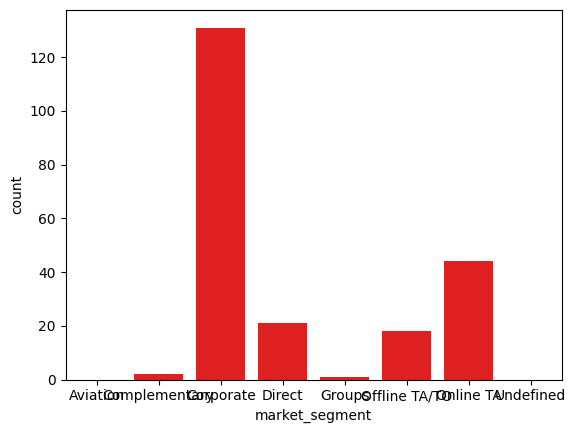

In [ ]:
sns.countplot(x=df['market_segment'],color='red')

<Axes: xlabel='distribution_channel', ylabel='count'>

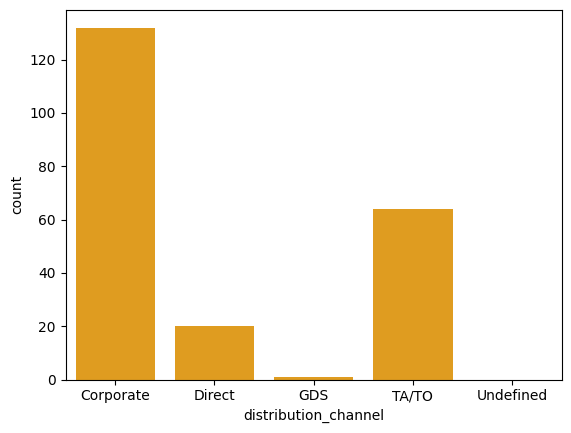

In [ ]:
sns.countplot(x=df['distribution_channel'],color='orange')

<Axes: xlabel='reserved_room_type', ylabel='count'>

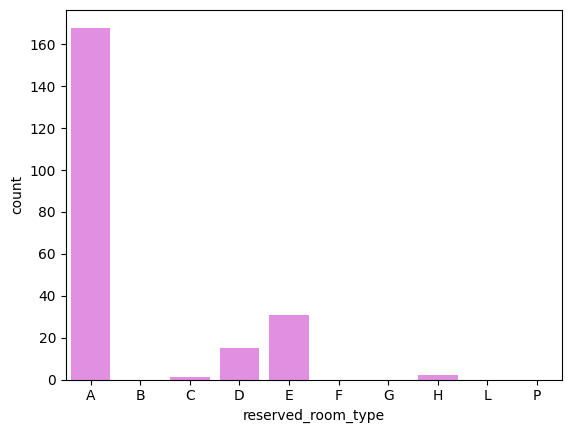

In [ ]:
sns.countplot(x=df['reserved_room_type'],color='violet')

<Axes: xlabel='assigned_room_type', ylabel='count'>

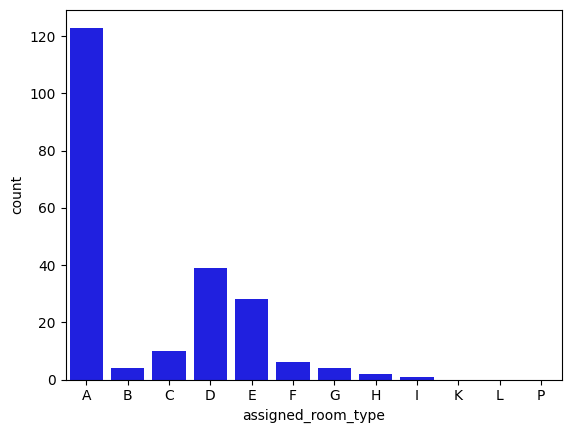

In [ ]:
sns.countplot(x=df['assigned_room_type'],color='blue')

<Axes: xlabel='deposit_type', ylabel='count'>

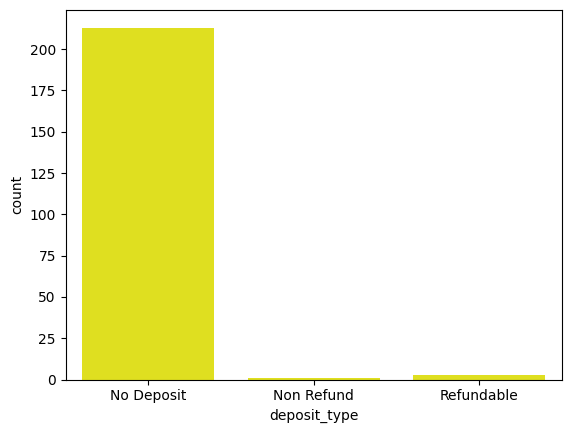

In [ ]:
sns.countplot(x=df['deposit_type'],color='yellow')

<Axes: xlabel='customer_type', ylabel='count'>

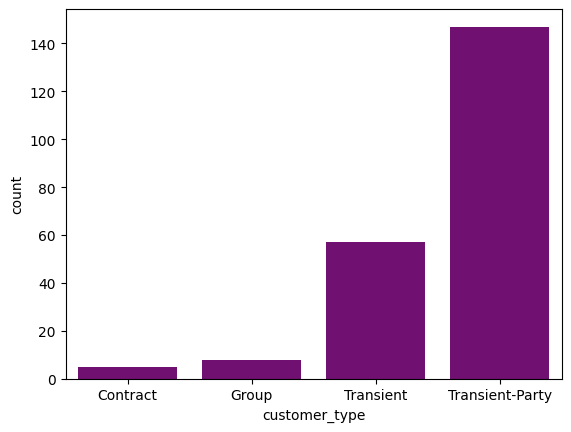

In [ ]:
sns.countplot(x=df['customer_type'],color='purple')

<Axes: xlabel='reservation_status', ylabel='count'>

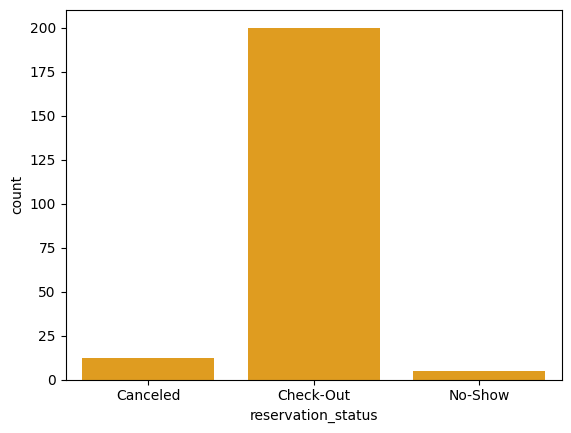

In [ ]:
sns.countplot(x=df['reservation_status'],color='orange')

**BIVARIENT ANALYSIS**
#numerical vs numerical

#numerical_data:is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests

#categorical_data:hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status

#date_time_data:reservation_status_date

<Axes: xlabel='reservation_status_date', ylabel='arrival_date_week_number'>

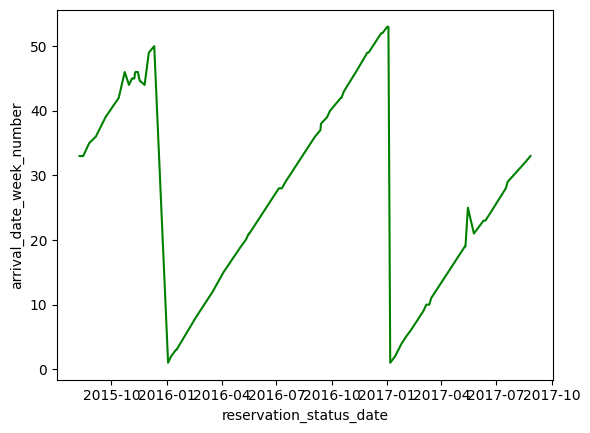

In [ ]:
sns.lineplot(x='reservation_status_date',y='arrival_date_week_number',data=df,color='green')

<Axes: xlabel='reservation_status_date', ylabel='lead_time'>

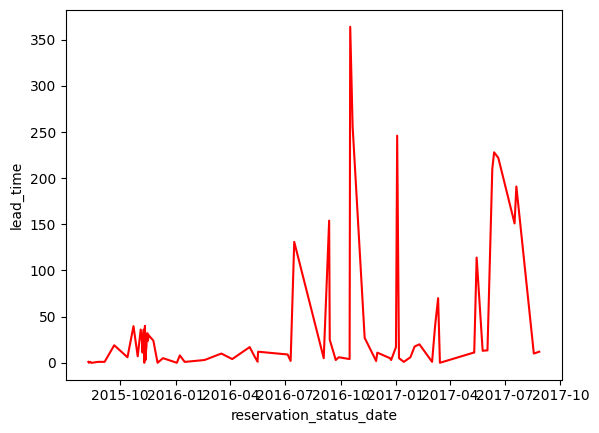

In [ ]:
sns.lineplot(x='reservation_status_date',y='lead_time',data=df,color='red')

<Axes: xlabel='reservation_status_date', ylabel='stays_in_weekend_nights'>

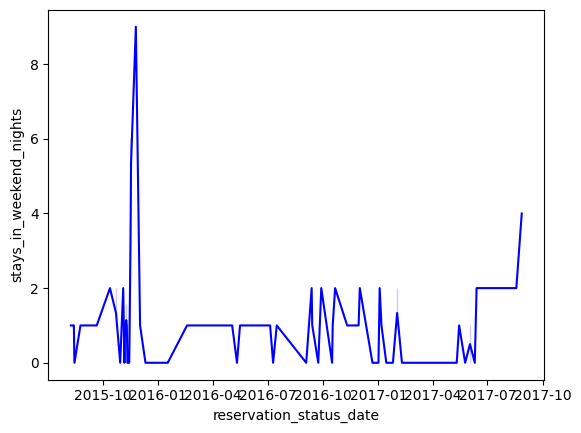

In [ ]:
sns.lineplot(x='reservation_status_date',y='stays_in_weekend_nights',data=df,color='blue')

<Axes: xlabel='reservation_status_date', ylabel='stays_in_week_nights'>

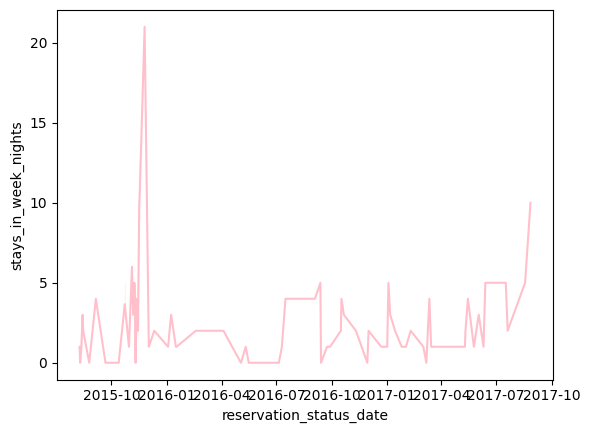

In [ ]:
sns.lineplot(x='reservation_status_date',y='stays_in_week_nights',data=df,color='pink')

<Axes: xlabel='arrival_date_year', ylabel='lead_time'>

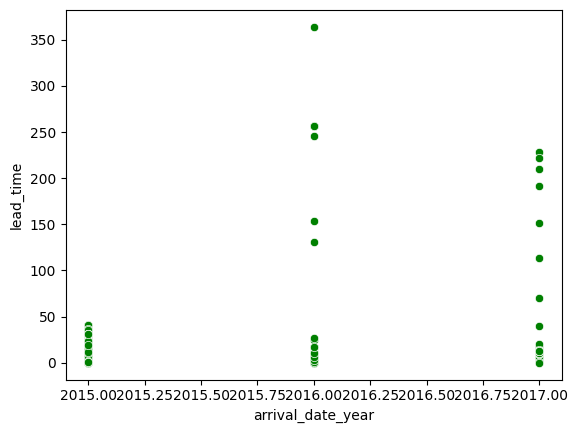

In [ ]:
sns.scatterplot(x='arrival_date_year',y='lead_time',data=df,color='green')

<Axes: xlabel='arrival_date_year', ylabel='stays_in_weekend_nights'>

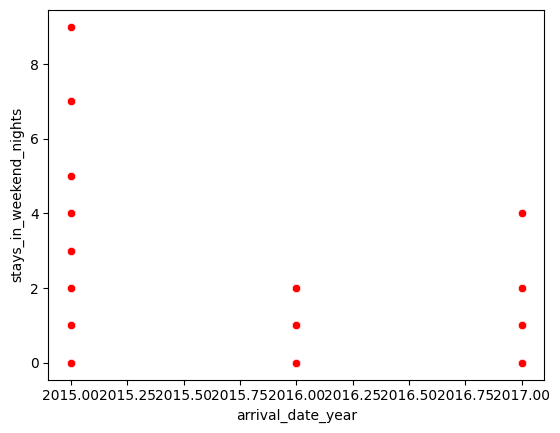

In [ ]:
sns.scatterplot(x='arrival_date_year',y='stays_in_weekend_nights',data=df,color='red')

<Axes: xlabel='arrival_date_year', ylabel='stays_in_week_nights'>

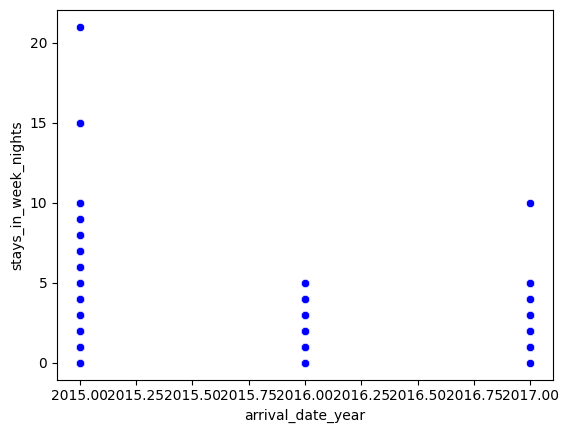

In [ ]:
sns.scatterplot(x='arrival_date_year',y='stays_in_week_nights',data=df,color='blue')

<Axes: xlabel='arrival_date_year', ylabel='adults'>

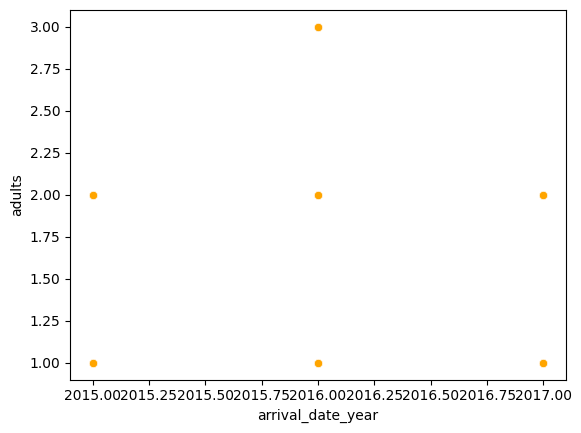

In [ ]:
sns.scatterplot(x='arrival_date_year',y='adults',data=df,color='orange')

<Axes: xlabel='arrival_date_year', ylabel='children'>

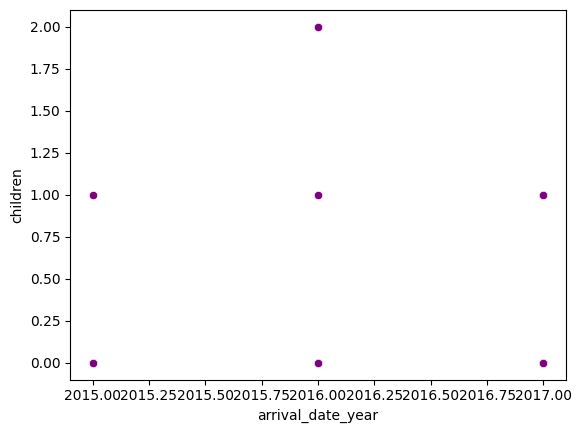

In [ ]:
sns.scatterplot(x='arrival_date_year',y='children',data=df,color='purple')

<Axes: xlabel='arrival_date_year', ylabel='babies'>

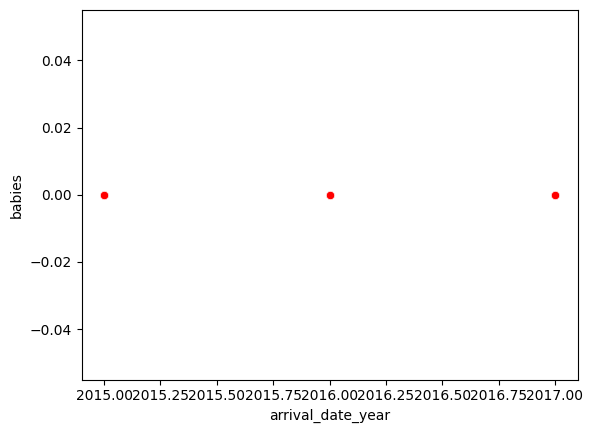

In [ ]:
sns.scatterplot(x='arrival_date_year',y='babies',data=df,color='red')

<Axes: xlabel='arrival_date_year', ylabel='adr'>

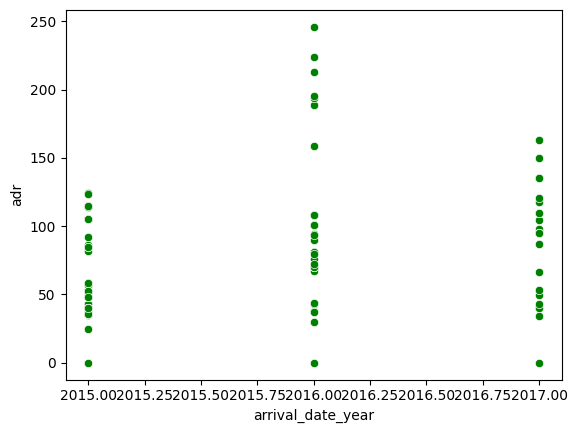

In [ ]:
sns.scatterplot(x='arrival_date_year',y='adr',data=df,color='green')

<Axes: xlabel='agent', ylabel='company'>

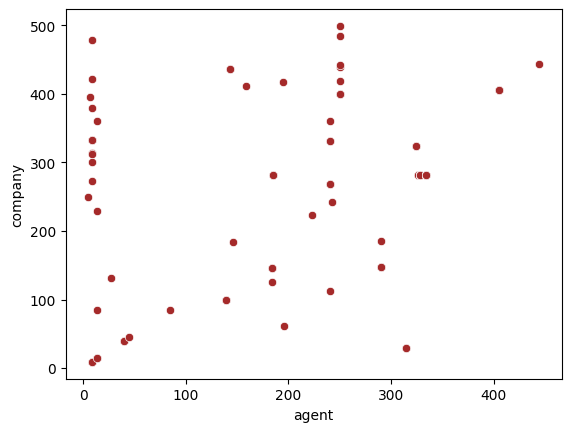

In [ ]:
sns.scatterplot(x='agent',y='company',data=df,color='brown')

**categorical vs numerical**

<Axes: xlabel='hotel', ylabel='is_repeated_guest'>

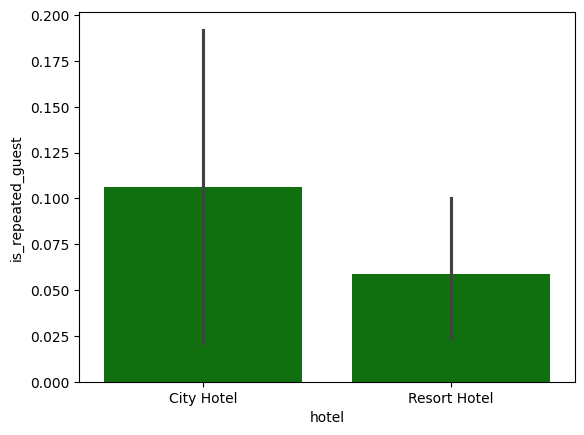

In [ ]:
sns.barplot(x='hotel',y='is_repeated_guest',data=df,color='green')

<Axes: xlabel='hotel', ylabel='lead_time'>

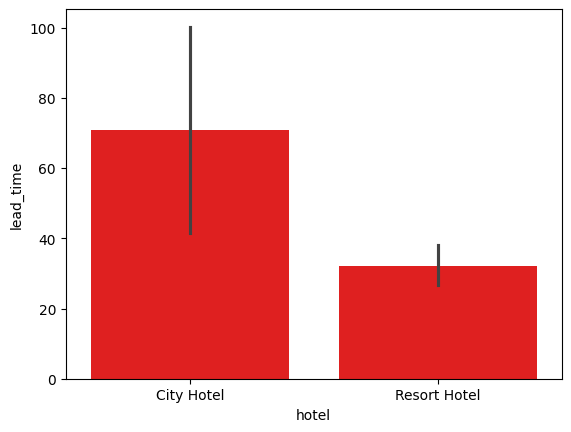

In [ ]:
sns.barplot(x='hotel',y='lead_time',data=df,color='red')

<Axes: xlabel='hotel', ylabel='stays_in_weekend_nights'>

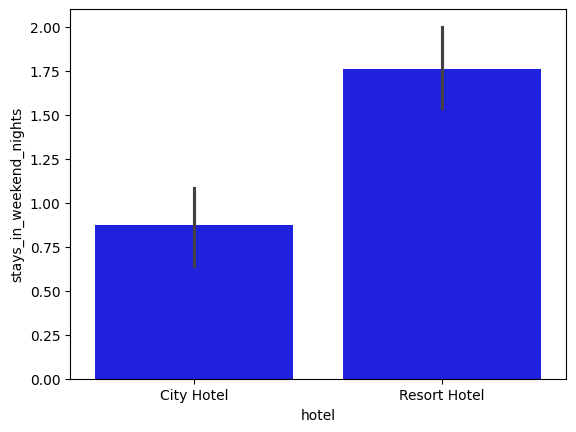

In [ ]:
sns.barplot(x='hotel',y='stays_in_weekend_nights',data=df,color='blue')

<Axes: xlabel='hotel', ylabel='adults'>

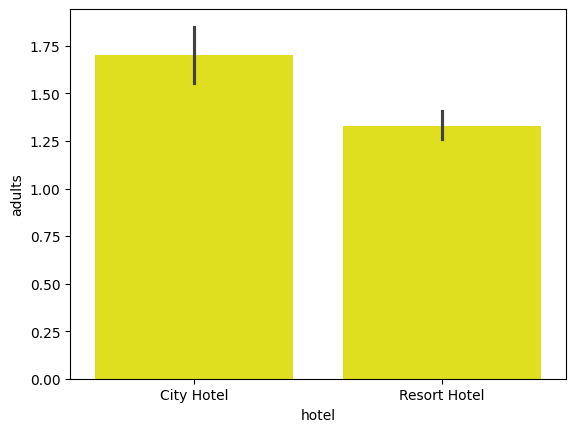

In [ ]:
sns.barplot(x='hotel',y='adults',data=df,color='yellow')

<Axes: xlabel='hotel', ylabel='children'>

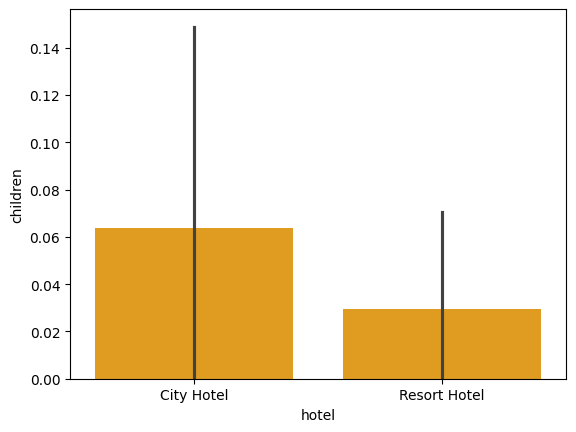

In [ ]:
sns.barplot(x='hotel',y='children',data=df,color='orange')

<Axes: xlabel='arrival_date_month', ylabel='arrival_date_day_of_month'>

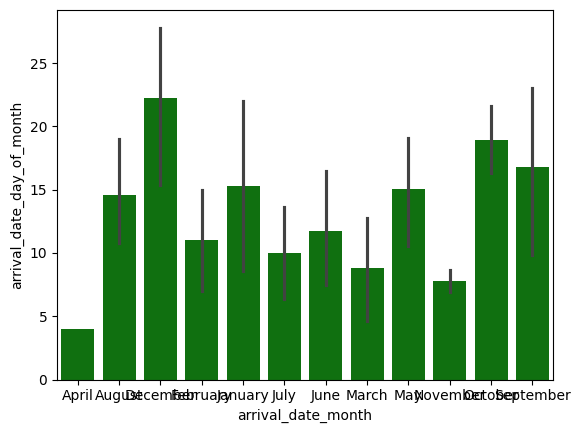

In [ ]:
sns.barplot(x='arrival_date_month',y='arrival_date_day_of_month',data=df,color='green')

<Axes: xlabel='arrival_date_month', ylabel='stays_in_weekend_nights'>

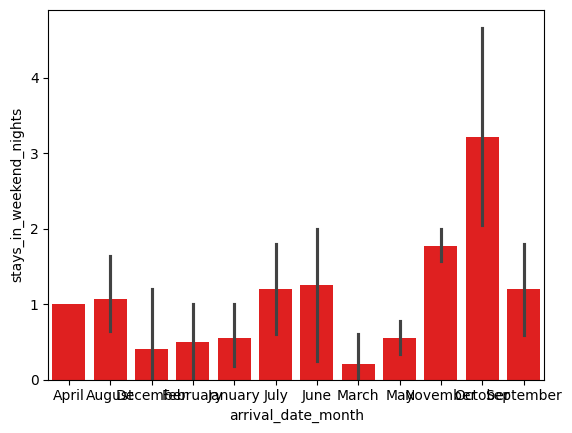

In [ ]:
sns.barplot(x='arrival_date_month',y='stays_in_weekend_nights',data=df,color='red')

<Axes: xlabel='hotel', ylabel='total_of_special_requests'>

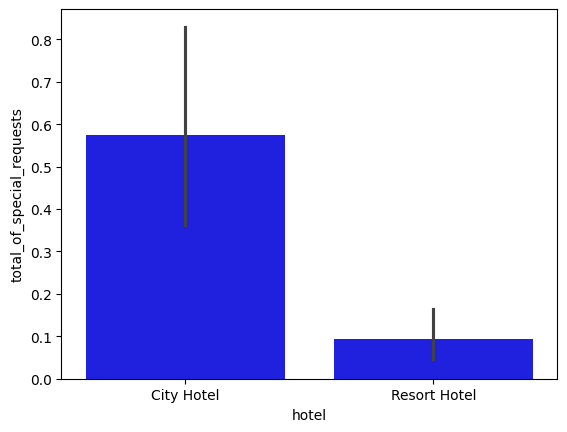

In [ ]:
sns.barplot(x='hotel',y='total_of_special_requests',data=df,color='blue')

<Axes: xlabel='customer_type', ylabel='company'>

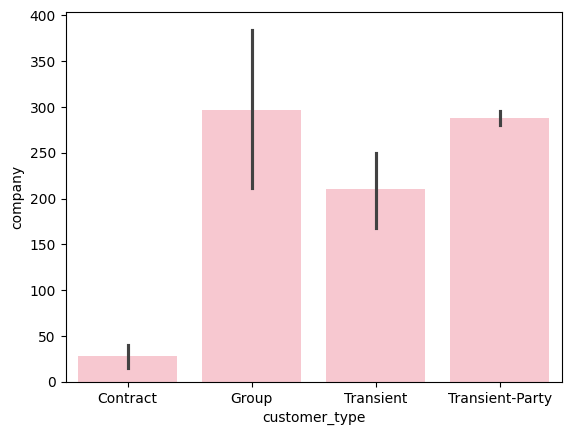

In [ ]:
sns.barplot(x='customer_type',y='company',data=df,color='pink')

<Axes: xlabel='assigned_room_type', ylabel='children'>

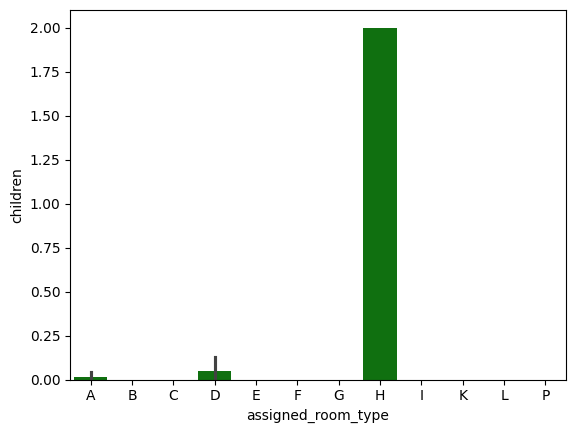

In [ ]:
sns.barplot(x='assigned_room_type',y='children',data=df,color='green')

<Axes: xlabel='assigned_room_type', ylabel='adults'>

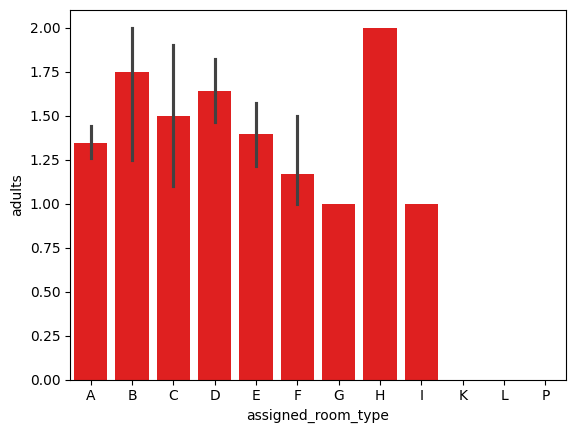

In [ ]:
sns.barplot(x='assigned_room_type',y='adults',data=df,color='red')

<Axes: xlabel='customer_type', ylabel='agent'>

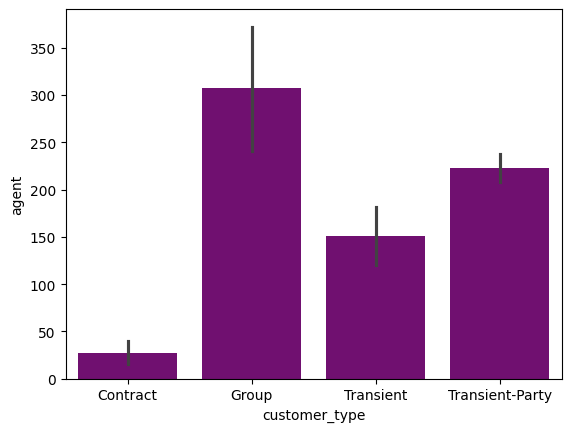

In [ ]:
sns.barplot(x='customer_type',y='agent',data=df,color='purple')

<Axes: xlabel='customer_type', ylabel='total_of_special_requests'>

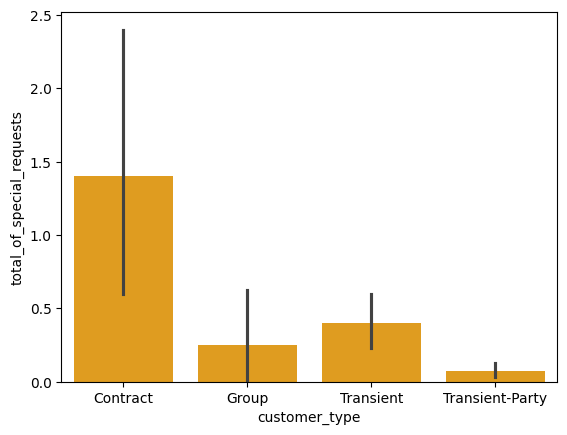

In [ ]:
sns.barplot(x='customer_type',y='total_of_special_requests',data=df,color='orange')

**MULTIVARIENT ANALYSIS**

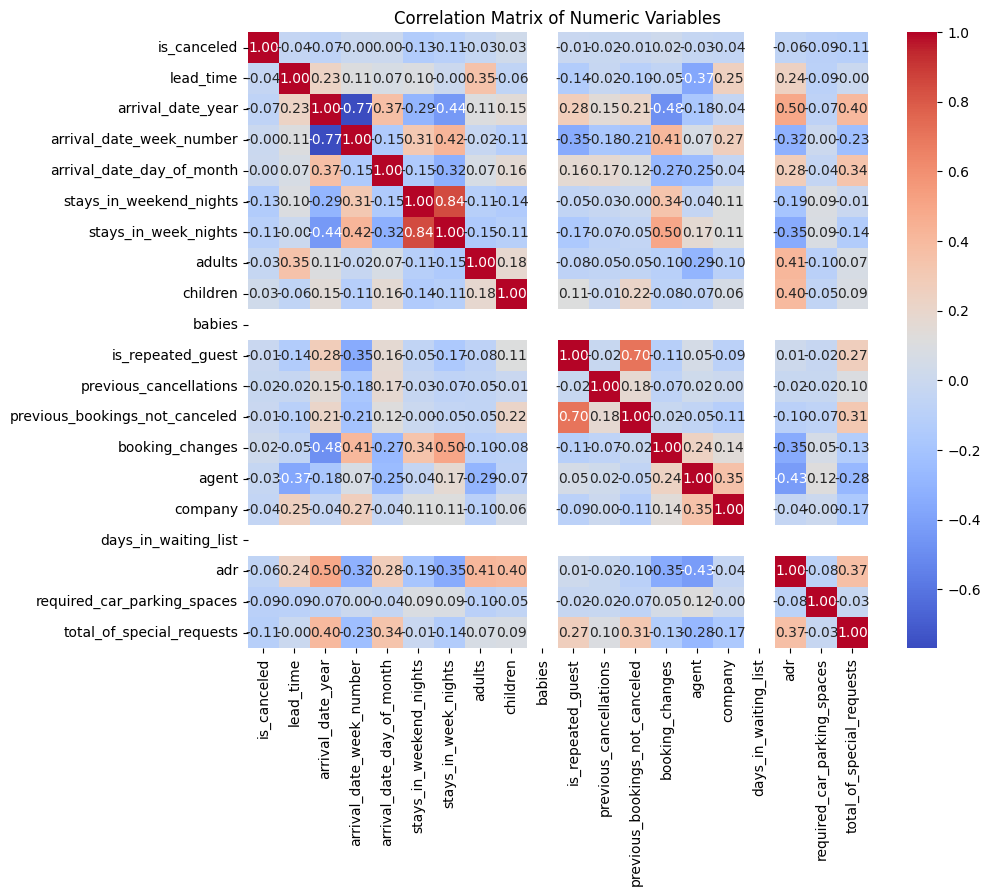

In [ ]:
numeric_cols=['is_canceled','lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','company','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

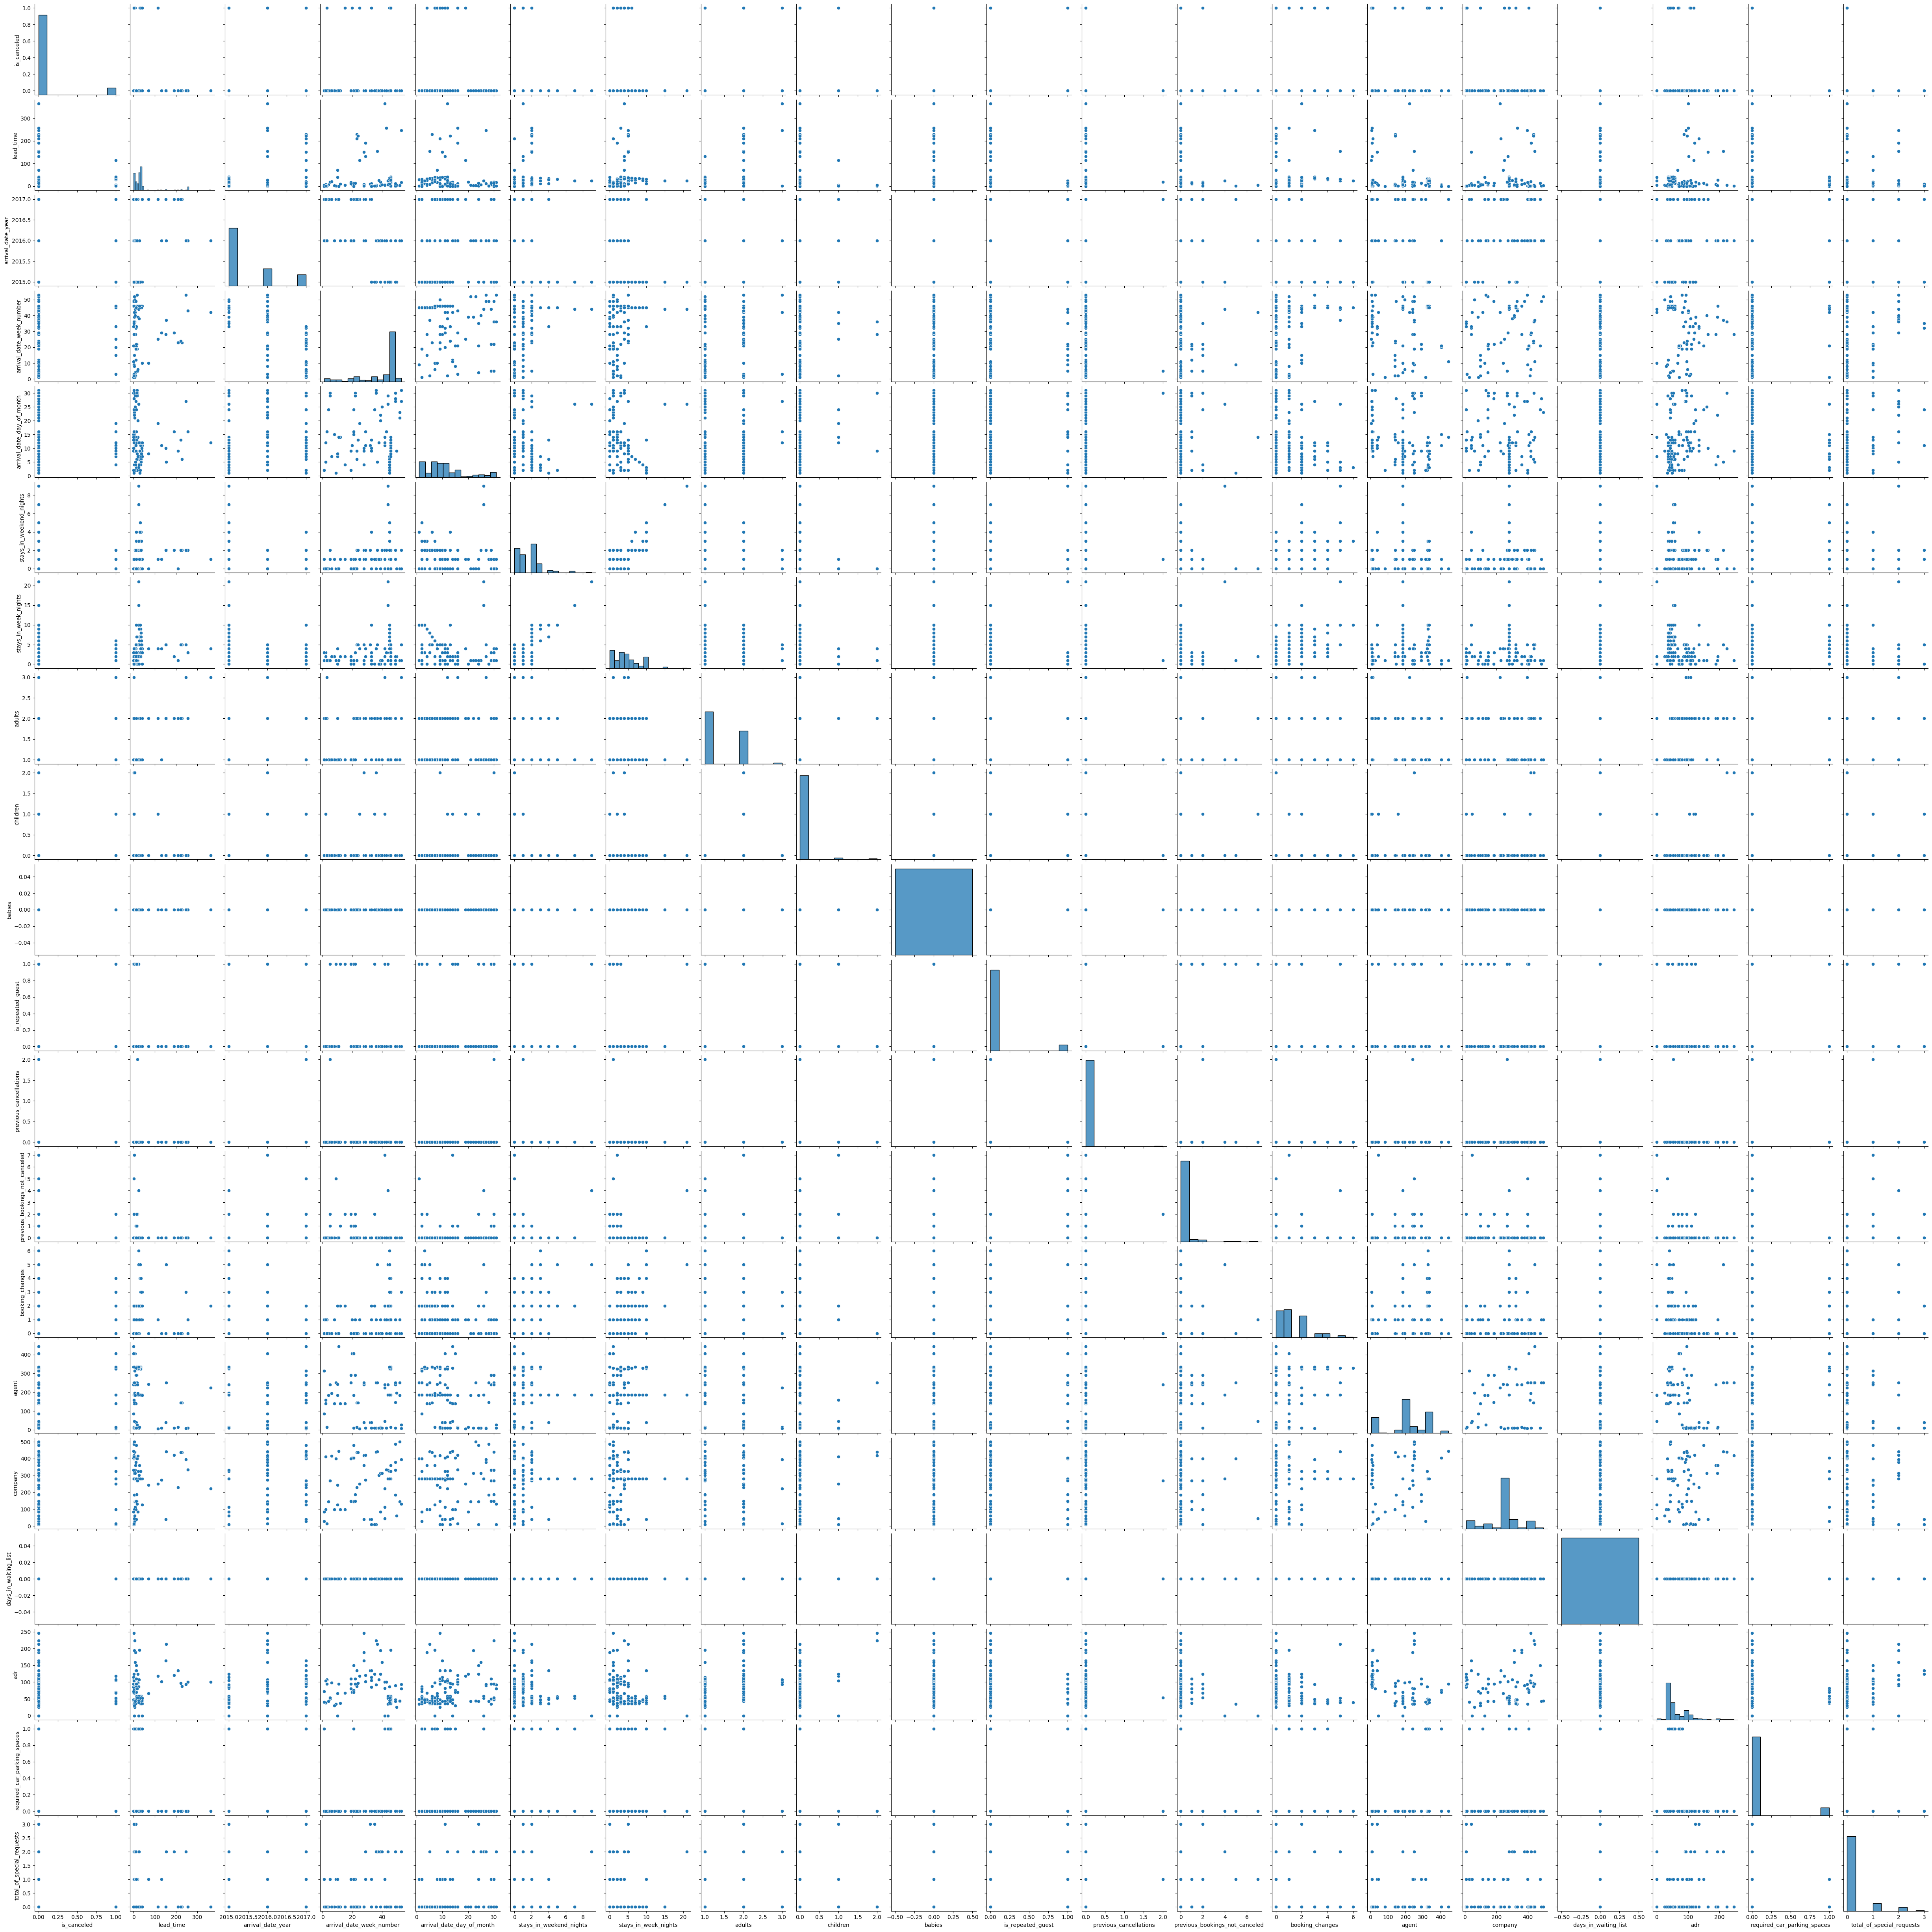

In [ ]:
numeric_cols=['is_canceled','lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','company','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']
sns.pairplot(df[numeric_cols])
plt.show()

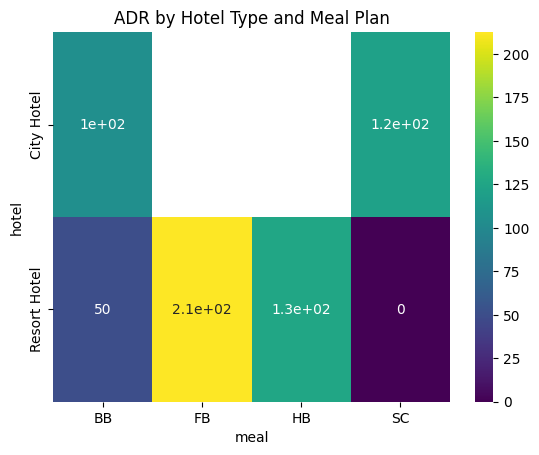

In [ ]:
pivot_table = df.pivot_table(values='adr', index='hotel', columns='meal', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('ADR by Hotel Type and Meal Plan')
plt.show()


In [ ]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
2392    Resort Hotel            0          6               2015   
2697    Resort Hotel            0         24               2015   
2867    Resort Hotel            0         24               2015   
2877    Resort Hotel            0         24               2015   
2878    Resort Hotel            0         24               2015   
...              ...          ...        ...                ...   
112499    City Hotel            0         13               2017   
113046    City Hotel            0         13               2017   
113082    City Hotel            0         13               2017   
113627    City Hotel            0        210               2017   
116451    City Hotel            0        191               2017   

       arrival_date_month  arrival_date_week_number  \
2392              October                        42   
2697              October                        44   
2867             November                        45   
2877             November                        45   
2878             November                        45   
...                   ...                       ...   
112499                May                        21   
113046                May                        22   
113082                May                        22   
113627               June                        23   
116451               July                        29   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2392                           11                        2   
2697                           26                        7   
2867                            3                        0   
2877                            3                        2   
2878                            3                        3   
...                           ...                      ...   
112499                         24                        0   
113046                         29                        1   
113082                         29                        1   
113627                          9                        0   
116451                         16                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
2392                       0       2  ...    No Deposit  240.0   113.0   
2697                      15       1  ...    No Deposit  185.0   281.0   
2867                       3       2  ...    No Deposit  334.0   281.0   
2877                      10       1  ...    No Deposit  328.0   281.0   
2878                      10       2  ...    No Deposit  326.0   281.0   
...                      ...     ...  ...           ...    ...     ...   
112499                     1       2  ...    No Deposit    9.0   478.0   
113046                     3       1  ...    No Deposit  290.0   148.0   
113082                     3       2  ...    No Deposit  290.0   148.0   
113627                     1       2  ...    No Deposit   14.0   229.0   
116451                     2       2  ...    No Deposit    9.0   421.0   

       days_in_waiting_list    customer_type    adr  \
2392                      0        Transient   82.0   
2697                      0  Transient-Party   52.2   
2867                      0  Transient-Party   48.0   
2877                      0  Transient-Party   40.0   
2878                      0  Transient-Party   48.0   
...                     ...              ...    ...   
112499                    0  Transient-Party  150.0   
113046                    0        Transient   95.0   
113082                    0        Transient  110.0   
113627                    0        Transient  135.0   
116451                    0        Transient  120.6   

        required_car_parking_spaces  total_of_special_requests  \
2392                              1                          1   
2697                              0                          0   
2867                              0                     

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
reservation_status_date             0
clusters                          217
dtype: int64

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(df[['is_canceled','lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr']])


centers = kmeans.cluster_centers_
labels = kmeans.labels_


In [ ]:
centers

array([[ 8.54271357e-02,  2.30753769e+01,  3.82613065e+01,
         1.05326633e+01,  1.54773869e+00,  1.35175879e+00,
         4.02010050e-02,  0.00000000e+00,  7.53768844e-02,
         1.00502513e-02,  1.60804020e-01,  1.34170854e+00,
         5.94263819e+01],
       [ 0.00000000e+00,  2.33388889e+02,  3.75000000e+01,
         1.40555556e+01,  1.77777778e+00,  2.05555556e+00,
         1.38777878e-17,  0.00000000e+00, -1.38777878e-17,
         3.46944695e-18,  5.55111512e-17,  6.66666667e-01,
         1.12077222e+02]])

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int32)

In [ ]:
df['clusters']=labels

In [ ]:
df=df.reset_index()

In [ ]:
df

index         hotel  is_canceled  lead_time  arrival_date_year  \
0      2392  Resort Hotel            0          6               2015   
1      2697  Resort Hotel            0         24               2015   
2      2867  Resort Hotel            0         24               2015   
3      2877  Resort Hotel            0         24               2015   
4      2878  Resort Hotel            0         24               2015   
..      ...           ...          ...        ...                ...   
212  112499    City Hotel            0         13               2017   
213  113046    City Hotel            0         13               2017   
214  113082    City Hotel            0         13               2017   
215  113627    City Hotel            0        210               2017   
216  116451    City Hotel            0        191               2017   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0              October                        42                         11   
1              October                        44                         26   
2             November                        45                          3   
3             November                        45                          3   
4             November                        45                          3   
..                 ...                       ...                        ...   
212                May                        21                         24   
213                May                        22                         29   
214                May                        22                         29   
215               June                        23                          9   
216               July                        29                         16   

     stays_in_weekend_nights  stays_in_week_nights  ...  agent  company  \
0                          2                     0  ...  240.0    113.0   
1                          7                    15  ...  185.0    281.0   
2                          0                     3  ...  334.0    281.0   
3                          2                    10  ...  328.0    281.0   
4                          3                    10  ...  326.0    281.0   
..                       ...                   ...  ...    ...      ...   
212                        0                     1  ...    9.0    478.0   
213                        1                     3  ...  290.0    148.0   
214                        1                     3  ...  290.0    148.0   
215                        0                     1  ...   14.0    229.0   
216                        2                     2  ...    9.0    421.0   

     days_in_waiting_list    customer_type    adr required_car_parking_spaces  \
0                       0        Transient   82.0                           1   
1                       0  Transient-Party   52.2                           0   
2                       0  Transient-Party   48.0                           0   
3                       0  Transient-Party   40.0                           0   
4                       0  Transient-Party   48.0                           0   
..                    ...              ...    ...                         ...   
212                     0  Transient-Party  150.0                           0   
213                     0        Transient   95.0                           0   
214                     0        Transient  110.0                           0   
215                     0        Transient  135.0                           0   
216                     0        Transient  120.6                           0   

    total_of_special_requests  reservation_status  reservation_status_date  \
0                           1           Check-Out               2015-10-13   
1                           0           Check-Out               2015-11-17   
2                           0           Check-Out               2015-11-06   
3     

In [ ]:
df['clusters'] = pd.DataFrame(labels)

In [ ]:
df

index         hotel  is_canceled  lead_time  arrival_date_year  \
0      2392  Resort Hotel            0          6               2015   
1      2697  Resort Hotel            0         24               2015   
2      2867  Resort Hotel            0         24               2015   
3      2877  Resort Hotel            0         24               2015   
4      2878  Resort Hotel            0         24               2015   
..      ...           ...          ...        ...                ...   
212  112499    City Hotel            0         13               2017   
213  113046    City Hotel            0         13               2017   
214  113082    City Hotel            0         13               2017   
215  113627    City Hotel            0        210               2017   
216  116451    City Hotel            0        191               2017   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0              October                        42                         11   
1              October                        44                         26   
2             November                        45                          3   
3             November                        45                          3   
4             November                        45                          3   
..                 ...                       ...                        ...   
212                May                        21                         24   
213                May                        22                         29   
214                May                        22                         29   
215               June                        23                          9   
216               July                        29                         16   

     stays_in_weekend_nights  stays_in_week_nights  ...  agent  company  \
0                          2                     0  ...  240.0    113.0   
1                          7                    15  ...  185.0    281.0   
2                          0                     3  ...  334.0    281.0   
3                          2                    10  ...  328.0    281.0   
4                          3                    10  ...  326.0    281.0   
..                       ...                   ...  ...    ...      ...   
212                        0                     1  ...    9.0    478.0   
213                        1                     3  ...  290.0    148.0   
214                        1                     3  ...  290.0    148.0   
215                        0                     1  ...   14.0    229.0   
216                        2                     2  ...    9.0    421.0   

     days_in_waiting_list    customer_type    adr required_car_parking_spaces  \
0                       0        Transient   82.0                           1   
1                       0  Transient-Party   52.2                           0   
2                       0  Transient-Party   48.0                           0   
3                       0  Transient-Party   40.0                           0   
4                       0  Transient-Party   48.0                           0   
..                    ...              ...    ...                         ...   
212                     0  Transient-Party  150.0                           0   
213                     0        Transient   95.0                           0   
214                     0        Transient  110.0                           0   
215                     0        Transient  135.0                           0   
216                     0        Transient  120.6                           0   

    total_of_special_requests  reservation_status  reservation_status_date  \
0                           1           Check-Out               2015-10-13   
1                           0           Check-Out               2015-11-17   
2                           0           Check-Out               2015-11-06   
3     

In [ ]:
df['clusters'].value_counts()

clusters
0    199
1     18
Name: count, dtype: int64

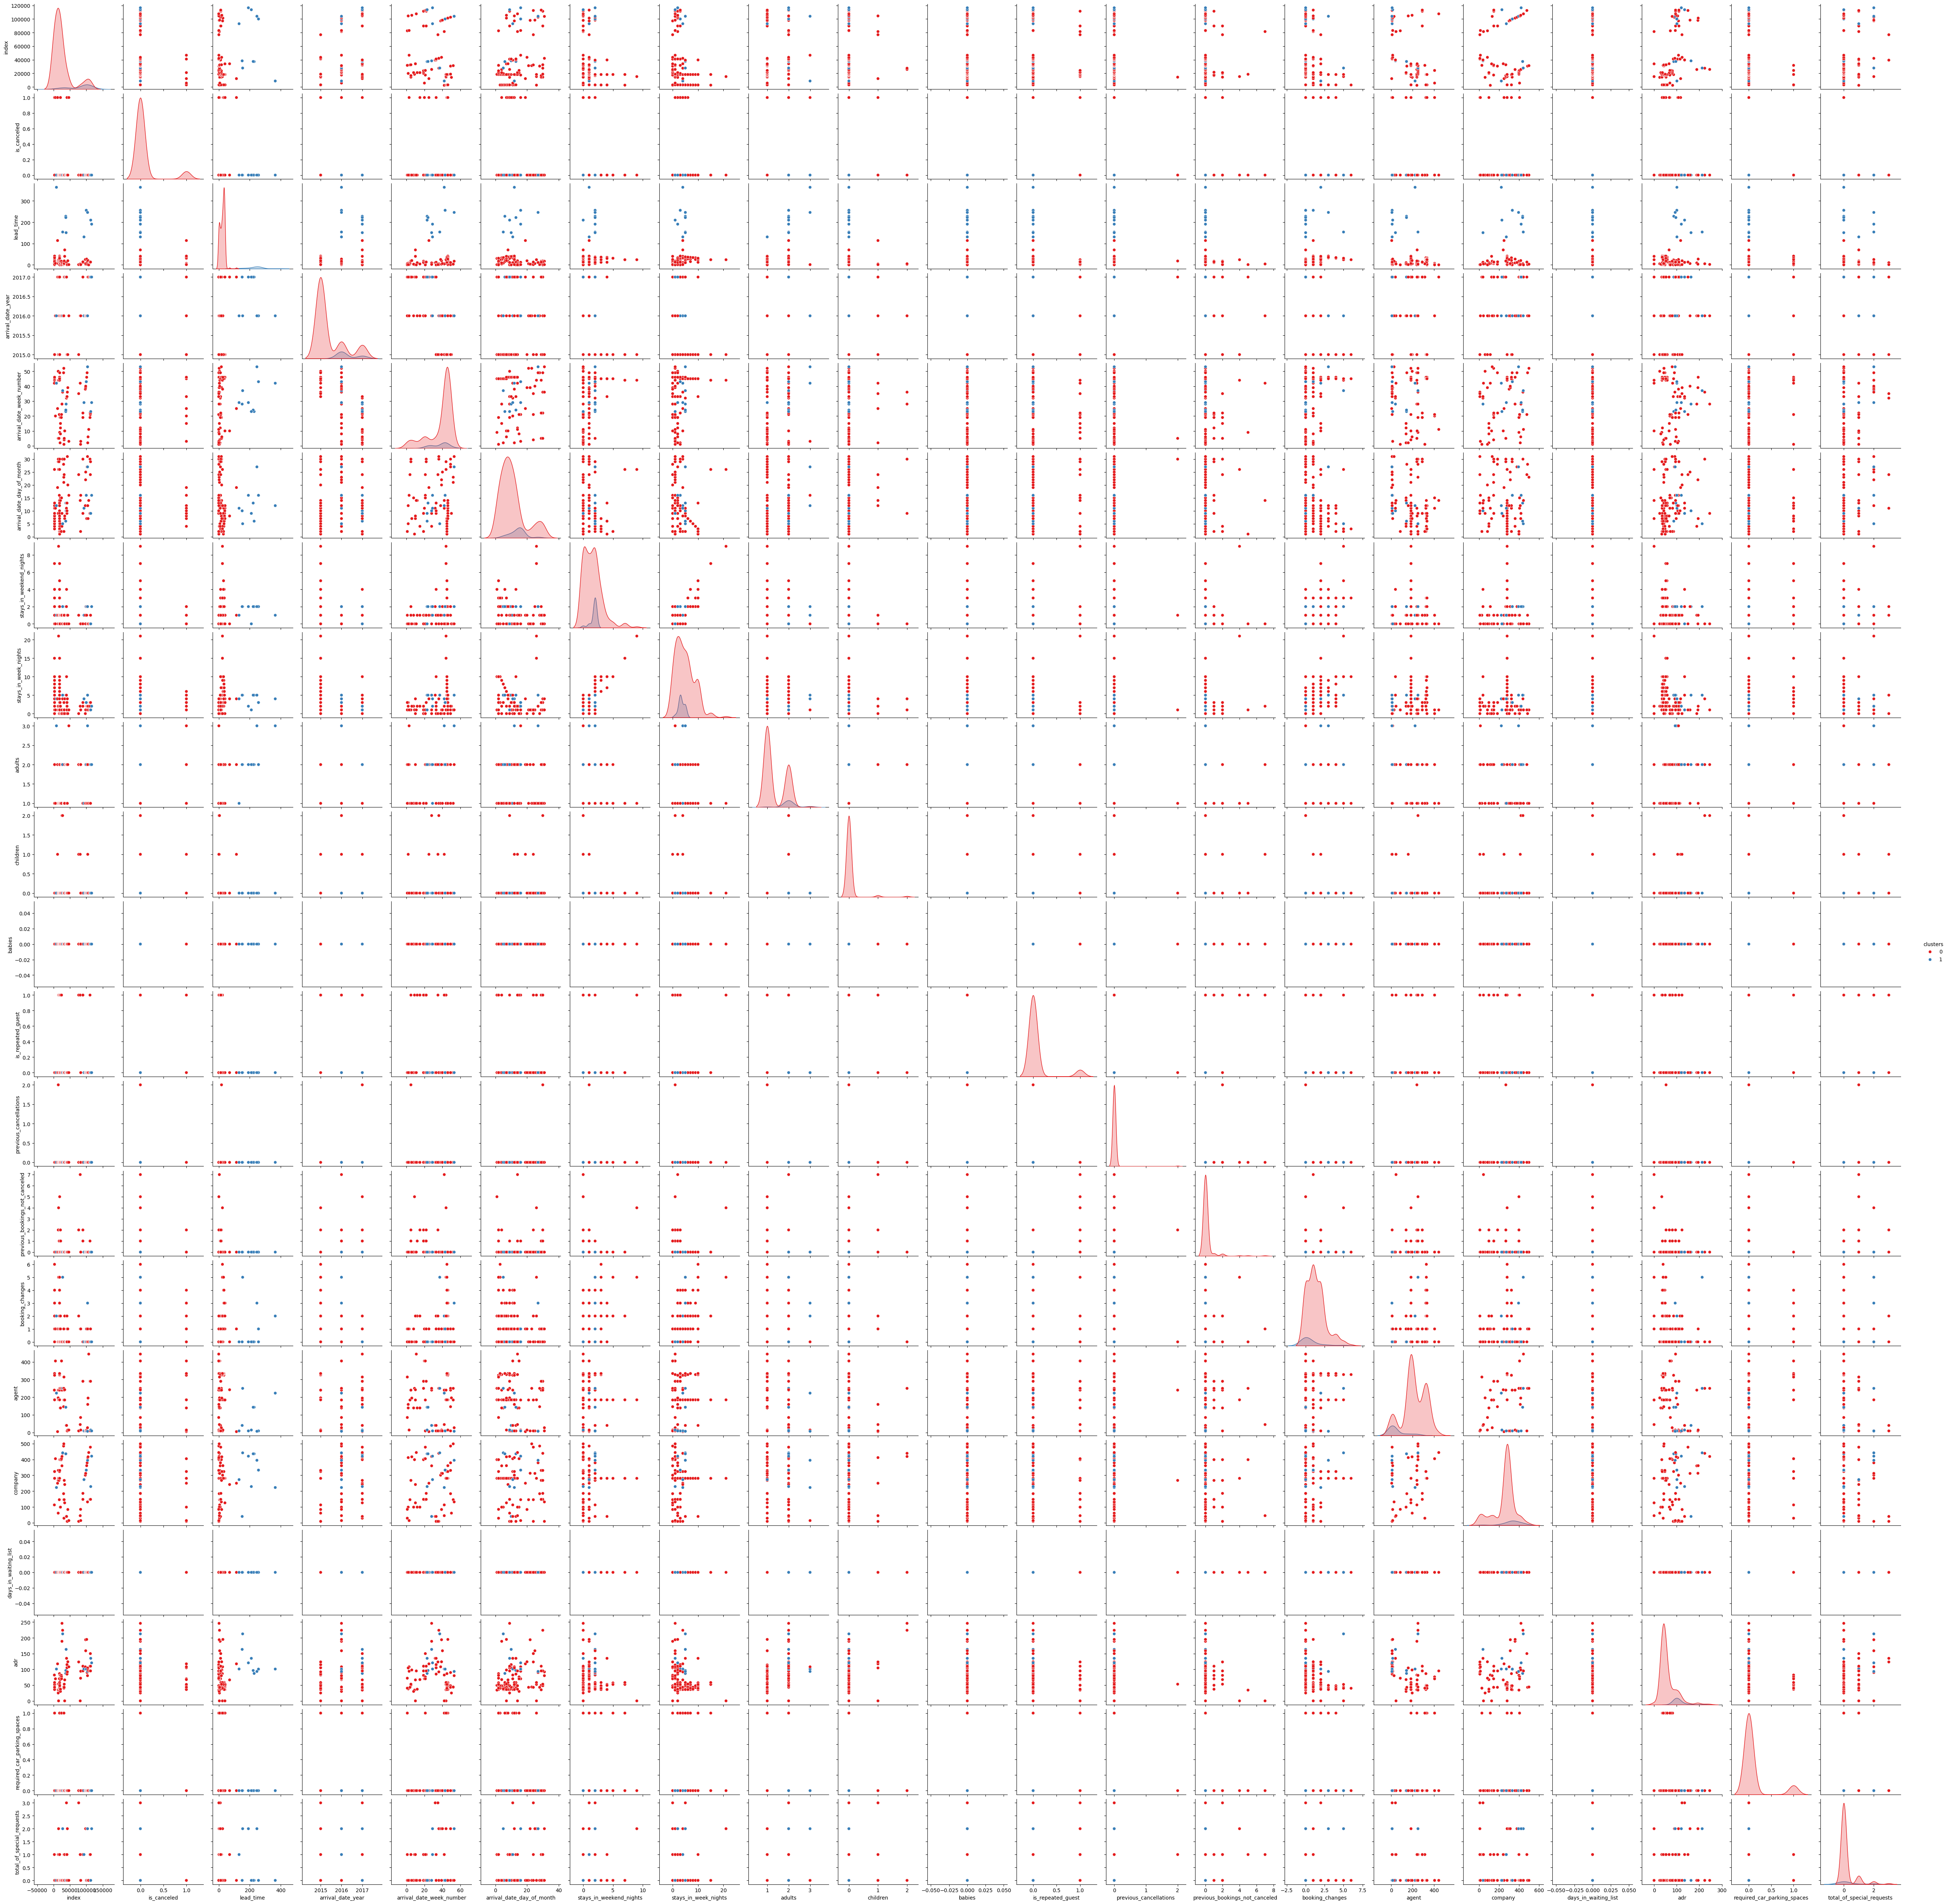

In [ ]:
sns.pairplot(df, hue='clusters', palette='Set1', diag_kind='kde')
plt.show()

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int32)

In [ ]:
df

index         hotel  is_canceled  lead_time  arrival_date_year  \
0      2392  Resort Hotel            0          6               2015   
1      2697  Resort Hotel            0         24               2015   
2      2867  Resort Hotel            0         24               2015   
3      2877  Resort Hotel            0         24               2015   
4      2878  Resort Hotel            0         24               2015   
..      ...           ...          ...        ...                ...   
212  112499    City Hotel            0         13               2017   
213  113046    City Hotel            0         13               2017   
214  113082    City Hotel            0         13               2017   
215  113627    City Hotel            0        210               2017   
216  116451    City Hotel            0        191               2017   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0              October                        42                         11   
1              October                        44                         26   
2             November                        45                          3   
3             November                        45                          3   
4             November                        45                          3   
..                 ...                       ...                        ...   
212                May                        21                         24   
213                May                        22                         29   
214                May                        22                         29   
215               June                        23                          9   
216               July                        29                         16   

     stays_in_weekend_nights  stays_in_week_nights  ...  agent  company  \
0                          2                     0  ...  240.0    113.0   
1                          7                    15  ...  185.0    281.0   
2                          0                     3  ...  334.0    281.0   
3                          2                    10  ...  328.0    281.0   
4                          3                    10  ...  326.0    281.0   
..                       ...                   ...  ...    ...      ...   
212                        0                     1  ...    9.0    478.0   
213                        1                     3  ...  290.0    148.0   
214                        1                     3  ...  290.0    148.0   
215                        0                     1  ...   14.0    229.0   
216                        2                     2  ...    9.0    421.0   

     days_in_waiting_list    customer_type    adr required_car_parking_spaces  \
0                       0        Transient   82.0                           1   
1                       0  Transient-Party   52.2                           0   
2                       0  Transient-Party   48.0                           0   
3                       0  Transient-Party   40.0                           0   
4                       0  Transient-Party   48.0                           0   
..                    ...              ...    ...                         ...   
212                     0  Transient-Party  150.0                           0   
213                     0        Transient   95.0                           0   
214                     0        Transient  110.0                           0   
215                     0        Transient  135.0                           0   
216                     0        Transient  120.6                           0   

    total_of_special_requests  reservation_status  reservation_status_date  \
0                           1           Check-Out               2015-10-13   
1                           0           Check-Out               2015-11-17   
2                           0           Check-Out               2015-11-06   
3     

In [ ]:
df.drop('clusters',axis=1)

index         hotel  is_canceled  lead_time  arrival_date_year  \
0      2392  Resort Hotel            0          6               2015   
1      2697  Resort Hotel            0         24               2015   
2      2867  Resort Hotel            0         24               2015   
3      2877  Resort Hotel            0         24               2015   
4      2878  Resort Hotel            0         24               2015   
..      ...           ...          ...        ...                ...   
212  112499    City Hotel            0         13               2017   
213  113046    City Hotel            0         13               2017   
214  113082    City Hotel            0         13               2017   
215  113627    City Hotel            0        210               2017   
216  116451    City Hotel            0        191               2017   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0              October                        42                         11   
1              October                        44                         26   
2             November                        45                          3   
3             November                        45                          3   
4             November                        45                          3   
..                 ...                       ...                        ...   
212                May                        21                         24   
213                May                        22                         29   
214                May                        22                         29   
215               June                        23                          9   
216               July                        29                         16   

     stays_in_weekend_nights  stays_in_week_nights  ...  deposit_type  agent  \
0                          2                     0  ...    No Deposit  240.0   
1                          7                    15  ...    No Deposit  185.0   
2                          0                     3  ...    No Deposit  334.0   
3                          2                    10  ...    No Deposit  328.0   
4                          3                    10  ...    No Deposit  326.0   
..                       ...                   ...  ...           ...    ...   
212                        0                     1  ...    No Deposit    9.0   
213                        1                     3  ...    No Deposit  290.0   
214                        1                     3  ...    No Deposit  290.0   
215                        0                     1  ...    No Deposit   14.0   
216                        2                     2  ...    No Deposit    9.0   

     company days_in_waiting_list    customer_type    adr  \
0      113.0                    0        Transient   82.0   
1      281.0                    0  Transient-Party   52.2   
2      281.0                    0  Transient-Party   48.0   
3      281.0                    0  Transient-Party   40.0   
4      281.0                    0  Transient-Party   48.0   
..       ...                  ...              ...    ...   
212    478.0                    0  Transient-Party  150.0   
213    148.0                    0        Transient   95.0   
214    148.0                    0        Transient  110.0   
215    229.0                    0        Transient  135.0   
216    421.0                    0        Transient  120.6   

    required_car_parking_spaces  total_of_special_requests  \
0                             1                          1   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
..                          ...                        ...   
212                           0                          1   
21

In [ ]:
from sklearn.manifold import TSNE


from sklearn.cluster import DBSCAN

# Apply t-SNE

tsne = TSNE(n_components=2, random_state=42)
from sklearn.manifold import TSNE


from sklearn.cluster import DBSCAN

# Apply t-SNE

tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(df[['is_canceled','lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr']])



# Perform DBSCAN Clustering

dbscan = DBSCAN(eps=1.5, min_samples=5)


labels = dbscan.fit_predict(X_tsne)

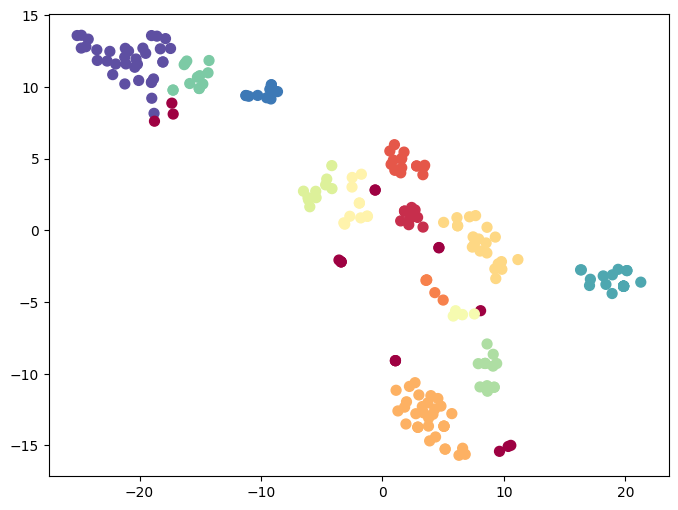

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Spectral', s=50)
plt.show()

In [ ]:
new_df = df[df['clusters']==1]

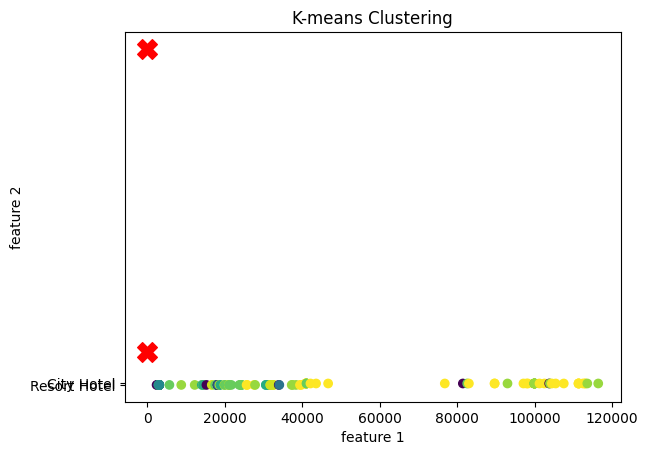

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=labels, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)

plt.title("K-means Clustering")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

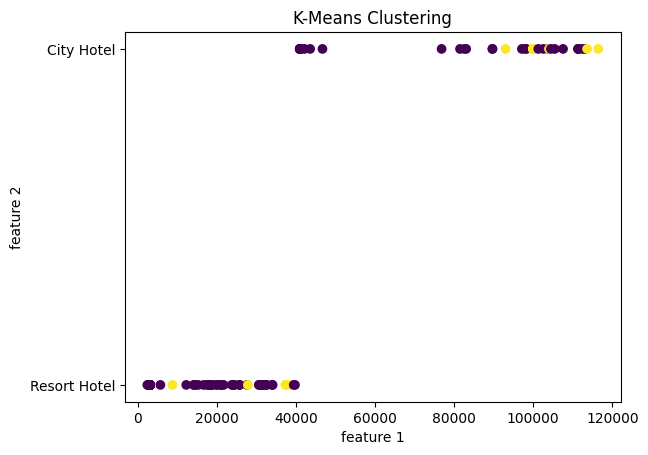

In [ ]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['clusters'], cmap='viridis')

plt.title('K-Means Clustering')

plt.xlabel('feature 1')

plt.ylabel('feature 2')


plt.show()

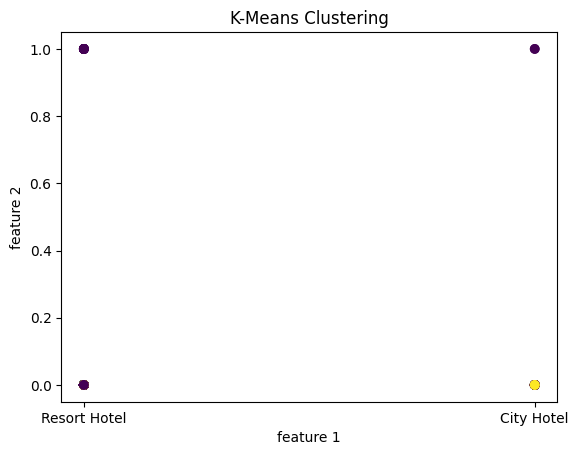

In [ ]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=df['clusters'], cmap='viridis')

plt.title('K-Means Clustering')

plt.xlabel('feature 1')

plt.ylabel('feature 2')


plt.show()

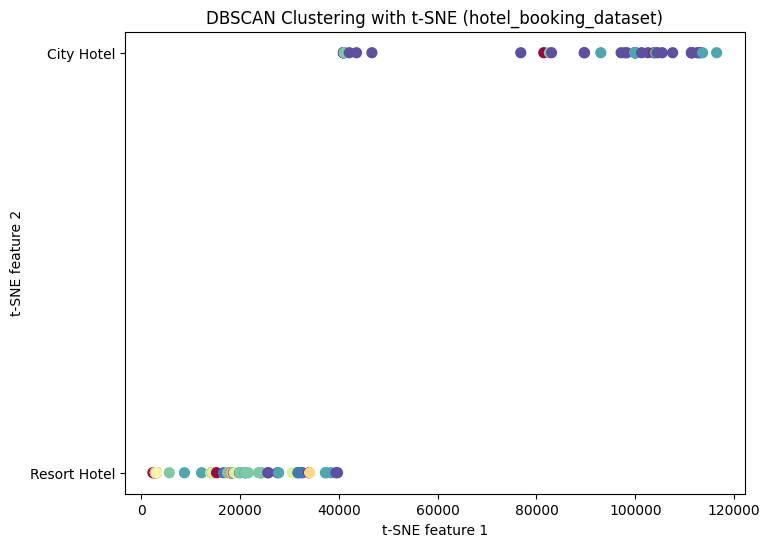

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='Spectral', s=50)

plt.title("DBSCAN Clustering with t-SNE (hotel_booking_dataset)")

plt.xlabel("t-SNE feature 1")

plt.ylabel("t-SNE feature 2")


plt.show()